In [1]:
import numpy as np
import json
import os
file=[]
for root, dirs, files in os.walk(r"C:\Users\Angshuman Bardhan\Desktop\PointChecker\files"):
    for i in files:
        if i.endswith(".json"):
            file.append(os.path.join(root, i))
            #print(os.path.join(root, file))

In [2]:
path=[]
path1=[]
for j in file:
    if j[-9:]!='info.json':
        path.append(j)
    else:
        path1.append(j)

In [3]:
meth=[]
for m in range(len(path)):
    meth.append(path[m][-37:-24])

In [4]:
meth1=[]
for m1 in range(len(meth)):
    m2=meth[m1].split('\\')
    meth1.append(m2[0:2])

In [5]:
fm=[]
fr=[]
for y in range(len(meth1)):
    fm.append(meth1[y][0])
    fr.append(meth1[y][1])

In [6]:
nam=[]
for k in path:
    nam.append(k[-19:-5])

In [7]:
def count_points(s):
    cord=[]
    f = open(s,) 
    data = json.load(f) 
    for i in data['annotation']['data_annotation']['marker']:
        cord.append(i.get('point_2D'))  
    f.close()
    lt=[]
    for j in range(len(cord)):
        x=cord[j].split(',')
        lt.append(x[0])
    return lt

In [8]:
cord2=[]
for ii in range(len(path)):
    cord1=count_points(path[ii])
    cord2.append([cord1[0],cord1[1],cord1[4],cord1[5]])

In [9]:
def Traverse(arr):
    d=arr
    c=0
    c1=0
    if len(d)==8:
        n = 4
        ll = [d[i:i+n] for i in range(0, len(d), n)]
        for j in range(len(ll)): 
            for z in range(0,len(ll[j])-1): 
                if ll[j][z]<ll[j][z+1] :
                    c=c+1 #Counting ok
                else:
                    c1=c1+1 #Counting error
        if c1==0:
            c2='NO'
        else:
            c2='YES'
    else:
        c2="YES" # Checking full error
        c=0
        c1=len(d)
    c3=[c,c1,c2]
    return c3

In [10]:
cord1=[]
for pp in range(len(path)):
    cd=count_points(path[pp])
    cord1.append(cd)

In [11]:
cord1

[['346.2',
  '525.5',
  '704.3210116299713',
  '886.184692382812',
  '344.3664828213777',
  '523.1392045454543',
  '702.1392267400565',
  '882.2755570845167'],
 ['341.58117343618',
  '529.1300625625391',
  '702.0474780691114',
  '890.6',
  '341.8425048828125',
  '522.2025146484375',
  '702.0',
  '884.642529296875'],
 ['345.4',
  '525.813688416875',
  '703.5790296697751',
  '883.2',
  '343.38485075698753',
  '523.5433105088995',
  '702.4745235227767',
  '882.1420677259342'],
 ['344.722509765625',
  '527.6050048828106',
  '703.2',
  '896.3249999999969',
  '342.6',
  '523.4',
  '703.0',
  '885.0'],
 ['342.5',
  '522.1819758858514',
  '702.6',
  '883.7',
  '341.3',
  '521.0',
  '701.2',
  '880.7'],
 ['340.8025146484375',
  '527.2',
  '700.9625',
  '876.5',
  '339.722509765625',
  '521.1625',
  '700.202490234375',
  '880.48251953125'],
 ['342.122509765625',
  '524.0425048828125',
  '701.642529296875',
  '884.042529296875',
  '341.92249755859376',
  '521.6425048828125',
  '701.122509765625',

In [12]:
count=[]
data=[]
for g in range(len(path)):
    count.append(len(count_points(path[g])))
    arr=count_points(path[g])
    data.append(Traverse(arr))

In [13]:
ok=[]
err=[]
wol=[]
for x in range(len(data)):
    ok.append(data[x][0])
    err.append(data[x][1])
    wol.append(data[x][2])        

In [14]:
import pandas as pd
#pd.set_option("display.min_rows", None, "display.min_columns", None)
pd.options.display.max_seq_items = 2000
dat = {'Folder':fm,'Sub Folder':fr,'File Address':path, 'Name':nam,'No. of Points Marked':count,'Correct Points in File':ok,'Error Points in File':err,'Whole File Error':wol}
df = pd.DataFrame(dat, columns = ['File Address', 'Name','No. of Points Marked','Correct Points in File','Error Points in File','Whole File Error'])

In [15]:
#df

In [16]:
data2 = {'Feature':['Total no. of files','Total no. of needed mark points','Total no. of actually marked points','Total no. of correct points','Total no. of error points','Total no. of Needed Correct Points','Total no. of Correct files','Total no. of Error files'], 'Count':[df['Name'].count(), (df['Name'].count())*8,df['No. of Points Marked'].sum(),df['Correct Points in File'].sum(),df['Error Points in File'].sum(),len(df)*6,len(df)-len(df[df['Whole File Error']=='YES']),len(df[df['Whole File Error']=='YES'])]} 
dff = pd.DataFrame(data2) 

In [17]:
dff

,Feature,Count
0,Total no. of files,672
1,Total no. of needed mark points,5376
2,Total no. of actually marked points,5376
3,Total no. of correct points,3957
4,Total no. of error points,75
5,Total no. of Needed Correct Points,4032
6,Total no. of Correct files,633
7,Total no. of Error files,39


In [18]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Angshuman Bardhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


### Checking Files with point marking less than 8 or more than 8.

In [19]:
df1=df[df['Whole File Error']=='YES']#Checking for Missing Points Files

### Checking Files with Error point marked.

In [20]:
#df2=df[df['Error Points in File']!=0]#Checking for Missing Points Files
#df2

In [21]:
data3 = {'Feature':['No. of info.json Files','Total no. of files','Total no. of Correct Files','Total no. of Error Files'], 'Count':[len(path1),df['Name'].count(),len(df)-len(df[df['Error Points in File']!=0]),len(df[df['Error Points in File']!=0])]} 
dfff = pd.DataFrame(data3) 

In [22]:
if df['Name'].count()==(len(df)-len(df[df['Error Points in File']!=0])+len(df[df['Error Points in File']!=0])):
    print("Success")
else:
    print('File Missing')
dfff

Success


,Feature,Count
0,No. of info.json Files,48
1,Total no. of files,672
2,Total no. of Correct Files,633
3,Total no. of Error Files,39


In [23]:
df1

,File Address,Name,No. of Points Marked,Correct Points in File,Error Points in File,Whole File Error
493,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitN_pointSelection\method1\res2\meta\result1r_ch_op.json,result1r_ch_op,8,5,1,YES
581,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res1\meta\result3r_ch_op.json,result3r_ch_op,8,3,3,YES
583,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res1\meta\result4r_ch_op.json,result4r_ch_op,8,3,3,YES
585,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res1\meta\result5r_ch_op.json,result5r_ch_op,8,3,3,YES
600,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res3\meta\result1l_ch_op.json,result1l_ch_op,8,5,1,YES
601,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res3\meta\result1r_ch_op.json,result1r_ch_op,8,5,1,YES
602,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res3\meta\result2l_ch_op.json,result2l_ch_op,8,5,1,YES
603,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res3\meta\result2r_ch_op.json,result2r_ch_op,8,3,3,YES
604,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res3\meta\result3l_ch_op.json,result3l_ch_op,8,5,1,YES
605,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method1\res3\meta\result3r_ch_op.json,result3r_ch_op,8,5,1,YES


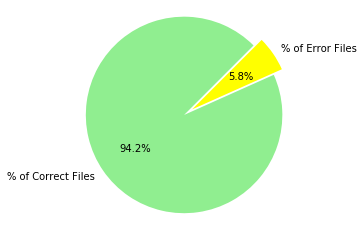

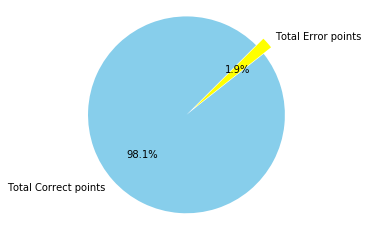

In [24]:
import matplotlib.pyplot as plt

plt.figure(0)
labels = '% of Correct Files', '% of Error Files'
sizes = [len(df)-len(df[df['Error Points in File']!=0]),len(df[df['Error Points in File']!=0])]
colors = ['lightgreen','yellow']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False, startangle=45)

plt.axis('equal')

plt.figure(1)
labels = 'Total Correct points', 'Total Error points'
sizes = [df['Correct Points in File'].sum(),df['Error Points in File'].sum()]
colors = ['skyblue','yellow']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False, startangle=45)

plt.axis('equal')
plt.show()

plt.show() #show all figures

In [29]:
p12=[]
p23=[]
p34=[]
p56=[]
p67=[]
p78=[]
p15=[]
p26=[]
p37=[]
p48=[]

for ff in range(len(cord1)):
    p12.append(abs(float(cord1[ff][0])-float(cord1[ff][1])))
    p23.append(abs(float(cord1[ff][1])-float(cord1[ff][2])))
    p34.append(abs(float(cord1[ff][2])-float(cord1[ff][3])))
    p56.append(abs(float(cord1[ff][4])-float(cord1[ff][5])))
    p67.append(abs(float(cord1[ff][5])-float(cord1[ff][6])))
    p78.append(abs(float(cord1[ff][6])-float(cord1[ff][7])))
    p15.append(abs(float(cord1[ff][0])-float(cord1[ff][4])))
    p26.append(abs(float(cord1[ff][1])-float(cord1[ff][5])))
    p37.append(abs(float(cord1[ff][2])-float(cord1[ff][6])))
    p48.append(abs(float(cord1[ff][3])-float(cord1[ff][7])))
    

In [46]:
dataf1={'Folder':fm, 'SubFolder':fr,'File Address':path,'Name':nam,'Point 1-2':p12,'Point 2-3':p23,'Point 3-4':p34,'Point 5-6':p56,'Point 6-7':p67,'Point 7-8':p78,'Point 1-5':p15,'Point 2-6':p26,'Point 3-7':p37,'Point 4-8':p48} 
ddf1 = pd.DataFrame(dataf1) 

In [47]:
ddf1

,Folder,SubFolder,File Address,Name,Point 1-2,Point 2-3,Point 3-4,Point 5-6,Point 6-7,Point 7-8,Point 1-5,Point 2-6,Point 3-7,Point 4-8
0,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result1l_ch_op.json,result1l_ch_op,179.300000,178.821012,181.863681,178.772722,179.000022,180.136330,1.833517,2.360795,2.181785,3.909135
1,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result1r_ch_op.json,result1r_ch_op,187.548889,172.917416,188.552522,180.360010,179.797485,182.642529,0.261331,6.927548,0.047478,5.957471
2,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result2l_ch_op.json,result2l_ch_op,180.413688,177.765341,179.620970,180.158460,178.931213,179.667544,2.015149,2.270378,1.104506,1.057932
3,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result2r_ch_op.json,result2r_ch_op,182.882495,175.594995,193.125000,180.800000,179.600000,182.000000,2.122510,4.205005,0.200000,11.325000
4,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result3l_ch_op.json,result3l_ch_op,179.681976,180.418024,181.100000,179.700000,180.200000,179.500000,1.200000,1.181976,1.400000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result4r_ch_op.json,result4r_ch_op,181.280005,177.759985,186.297510,181.000000,179.560010,180.360010,540.320020,178.040015,179.279980,545.937500
668,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result5l_ch_op.json,result5l_ch_op,179.159985,177.480005,182.400000,178.502907,178.921273,180.187771,2.400000,3.057078,1.615810,3.828038
669,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result5r_ch_op.json,result5r_ch_op,181.647726,177.749686,186.758491,182.600561,180.521622,178.356066,541.305002,177.056716,181.214593,546.329149
670,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result6l_ch_op.json,result6l_ch_op,179.080029,178.000000,181.039990,181.320007,178.959985,179.880029,3.240002,1.000024,0.040039,1.200000


In [48]:
col=ddf1.columns

In [50]:
thr=[]
for ctt in range(4,len(col)):
    min_thresold, max_thresold = ddf1[col[ctt]].quantile([0.200, 0.800])
    thr.append([min_thresold, max_thresold])

In [51]:
th1=[]
th2=[]
for th in range(len(thr)):
    th1.append(thr[th][0])
    th2.append(thr[th][1])

In [52]:
ddt={'Point Margins':['Horizontal Points 1-2','Horizontal Points 2-3','Horizontal Points 3-4','Horizontal Points 5-6','Horizontal Points 6-7','Horizontal Points 7-8','Vertical Points 1-5','Vertical Points 2-6','Vertical Points 3-7','Vertical Points 4-8'],'Minimun':th1,'Maximum':th2}
ddtt=pd.DataFrame(ddt) 

In [53]:
ddtt

,Point Margins,Minimun,Maximum
0,Horizontal Points 1-2,89.500000,179.586667
1,Horizontal Points 2-3,88.700000,177.309818
2,Horizontal Points 3-4,89.580267,181.100000
3,Horizontal Points 5-6,89.600000,179.716006
4,Horizontal Points 6-7,89.400000,179.039990
5,Horizontal Points 7-8,89.700000,180.133416
6,Vertical Points 1-5,0.352000,2.474049
7,Vertical Points 2-6,0.500000,3.121841
8,Vertical Points 3-7,0.200000,1.427926
9,Vertical Points 4-8,0.566835,3.823993


In [54]:
minh=ddtt['Minimun'][0:6].mean()

In [55]:
maxh=ddtt['Maximum'][0:6].mean()

In [56]:
minv=ddtt['Minimun'][6:].mean()

In [57]:
maxv=ddtt['Maximum'][6:].mean()

In [58]:
ddff1 = ddf1[(ddf1['Point 1-2']<maxh) & (ddf1['Point 1-2']>minh)]

In [111]:
ddff1

,Folder,SubFolder,File Address,Name,Point 1-2,Point 2-3,Point 3-4,Point 5-6,Point 6-7,Point 7-8,Point 1-5,Point 2-6,Point 3-7,Point 4-8
0,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result1l_ch_op.json,result1l_ch_op,179.300000,178.821012,181.863681,178.772722,179.000022,180.136330,1.833517,2.360795,2.181785,3.909135
8,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result5l_ch_op.json,result5l_ch_op,179.159985,177.480005,182.400000,178.502907,178.921273,180.187771,2.400000,3.057078,1.615810,3.828038
10,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result6l_ch_op.json,result6l_ch_op,179.080029,178.000000,181.039990,181.320007,178.959985,179.880029,3.240002,1.000024,0.040039,1.200000
24,method1,res3,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res3\meta\result1l_ch_op.json,result1l_ch_op,90.000000,88.400003,91.200003,88.200000,89.533337,90.466675,0.666669,2.466669,1.333334,2.066663
25,method1,res3,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res3\meta\result1r_ch_op.json,result1r_ch_op,93.200000,86.000006,93.933331,90.200000,89.866669,90.933337,0.266669,2.733331,1.133331,1.866663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,method2,res3,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res3\meta\result3r_ch_op.json,result3r_ch_op,92.946153,88.269617,84.762215,90.012991,89.438751,225.058294,91.202778,88.269617,89.438751,220.381758
655,method2,res3,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res3\meta\result4r_ch_op.json,result4r_ch_op,90.023318,90.023318,90.023318,90.607885,88.854184,91.192452,0.000000,0.584567,0.584567,0.584567
660,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result1l_ch_op.json,result1l_ch_op,179.300000,178.821012,181.863681,178.772722,179.000022,180.136330,1.833517,2.360795,2.181785,3.909135
668,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result5l_ch_op.json,result5l_ch_op,179.159985,177.480005,182.400000,178.502907,178.921273,180.187771,2.400000,3.057078,1.615810,3.828038


In [75]:
ddl=ddf1.copy()

In [119]:
ddl

,Folder,SubFolder,File Address,Name,Point 1-2,Point 2-3,Point 3-4,Point 5-6,Point 6-7,Point 7-8,Point 1-5,Point 2-6,Point 3-7,Point 4-8
0,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result1l_ch_op.json,result1l_ch_op,179.300000,178.821012,181.863681,178.772722,179.000022,180.136330,1.833517,2.360795,2.181785,3.909135
1,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result1r_ch_op.json,result1r_ch_op,187.548889,172.917416,188.552522,180.360010,179.797485,182.642529,0.261331,6.927548,0.047478,5.957471
2,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result2l_ch_op.json,result2l_ch_op,180.413688,177.765341,179.620970,180.158460,178.931213,179.667544,2.015149,2.270378,1.104506,1.057932
3,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result2r_ch_op.json,result2r_ch_op,182.882495,175.594995,193.125000,180.800000,179.600000,182.000000,2.122510,4.205005,0.200000,11.325000
4,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result3l_ch_op.json,result3l_ch_op,179.681976,180.418024,181.100000,179.700000,180.200000,179.500000,1.200000,1.181976,1.400000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result4r_ch_op.json,result4r_ch_op,181.280005,177.759985,186.297510,181.000000,179.560010,180.360010,540.320020,178.040015,179.279980,545.937500
668,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result5l_ch_op.json,result5l_ch_op,179.159985,177.480005,182.400000,178.502907,178.921273,180.187771,2.400000,3.057078,1.615810,3.828038
669,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result5r_ch_op.json,result5r_ch_op,181.647726,177.749686,186.758491,182.600561,180.521622,178.356066,541.305002,177.056716,181.214593,546.329149
670,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result6l_ch_op.json,result6l_ch_op,179.080029,178.000000,181.039990,181.320007,178.959985,179.880029,3.240002,1.000024,0.040039,1.200000


In [118]:
dxt=pd.concat([ddl, ddff1]).drop_duplicates(keep=False)

In [120]:
ddff1

,Folder,SubFolder,File Address,Name,Point 1-2,Point 2-3,Point 3-4,Point 5-6,Point 6-7,Point 7-8,Point 1-5,Point 2-6,Point 3-7,Point 4-8
0,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result1l_ch_op.json,result1l_ch_op,179.300000,178.821012,181.863681,178.772722,179.000022,180.136330,1.833517,2.360795,2.181785,3.909135
8,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result5l_ch_op.json,result5l_ch_op,179.159985,177.480005,182.400000,178.502907,178.921273,180.187771,2.400000,3.057078,1.615810,3.828038
10,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result6l_ch_op.json,result6l_ch_op,179.080029,178.000000,181.039990,181.320007,178.959985,179.880029,3.240002,1.000024,0.040039,1.200000
24,method1,res3,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res3\meta\result1l_ch_op.json,result1l_ch_op,90.000000,88.400003,91.200003,88.200000,89.533337,90.466675,0.666669,2.466669,1.333334,2.066663
25,method1,res3,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res3\meta\result1r_ch_op.json,result1r_ch_op,93.200000,86.000006,93.933331,90.200000,89.866669,90.933337,0.266669,2.733331,1.133331,1.866663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,method2,res3,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res3\meta\result3r_ch_op.json,result3r_ch_op,92.946153,88.269617,84.762215,90.012991,89.438751,225.058294,91.202778,88.269617,89.438751,220.381758
655,method2,res3,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res3\meta\result4r_ch_op.json,result4r_ch_op,90.023318,90.023318,90.023318,90.607885,88.854184,91.192452,0.000000,0.584567,0.584567,0.584567
660,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result1l_ch_op.json,result1l_ch_op,179.300000,178.821012,181.863681,178.772722,179.000022,180.136330,1.833517,2.360795,2.181785,3.909135
668,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result5l_ch_op.json,result5l_ch_op,179.159985,177.480005,182.400000,178.502907,178.921273,180.187771,2.400000,3.057078,1.615810,3.828038


In [121]:
dxt

,Folder,SubFolder,File Address,Name,Point 1-2,Point 2-3,Point 3-4,Point 5-6,Point 6-7,Point 7-8,Point 1-5,Point 2-6,Point 3-7,Point 4-8
1,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result1r_ch_op.json,result1r_ch_op,187.548889,172.917416,188.552522,180.360010,179.797485,182.642529,0.261331,6.927548,0.047478,5.957471
2,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result2l_ch_op.json,result2l_ch_op,180.413688,177.765341,179.620970,180.158460,178.931213,179.667544,2.015149,2.270378,1.104506,1.057932
3,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result2r_ch_op.json,result2r_ch_op,182.882495,175.594995,193.125000,180.800000,179.600000,182.000000,2.122510,4.205005,0.200000,11.325000
4,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result3l_ch_op.json,result3l_ch_op,179.681976,180.418024,181.100000,179.700000,180.200000,179.500000,1.200000,1.181976,1.400000,3.000000
5,method1,res1,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\unitJ_pointSelection\method1\res1\meta\result3r_ch_op.json,result3r_ch_op,186.397485,173.762500,175.537500,181.439990,179.039990,180.280029,1.080005,6.037500,0.760010,3.982520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result3r_ch_op.json,result3r_ch_op,186.397485,173.762500,175.537500,180.280029,179.039990,181.439990,539.680005,173.002490,179.800000,536.777490
666,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result4l_ch_op.json,result4l_ch_op,181.919995,177.600024,182.400000,359.480005,179.480005,359.200012,539.000000,2.400000,0.520020,542.120032
667,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result4r_ch_op.json,result4r_ch_op,181.280005,177.759985,186.297510,181.000000,179.560010,180.360010,540.320020,178.040015,179.279980,545.937500
669,method2,res4,C:\Users\Angshuman Bardhan\Desktop\PointChecker\files\UnitX\method2\res4\meta\result5r_ch_op.json,result5r_ch_op,181.647726,177.749686,186.758491,182.600561,180.521622,178.356066,541.305002,177.056716,181.214593,546.329149
